# We are Working in leukemia Cancer

In [114]:
from pyopenms import *

## Digestion for protein in FASTA file with Trypsin (theoritical peptids)

In [115]:
dig = ProteaseDigestion()
dig.getEnzymeName()           # Trypsin
NOTC1 = "".join([l.strip() for l in open("NOTC1.fasta").readlines()[1:]])
NOTC1 = AASequence.fromString(NOTC1)
# create all digestion products
result = []
dig.digest(NOTC1, result)
# test that the result list contains peptides correctly
print(result[4].toString())
print("peptide length =",len(result))

CQDPNPCLSTPCK
peptide length = 156


In [116]:
dig.digest(NOTC1, result, 4,40)
# print all digested peptides
for s in result:
    print(s.toString())

MPPLLAPLLCLALLPALAAR
CSQPGETCLNGGK
CEAANGTEACVCGGAFVGPR
CQDPNPCLSTPCK
NAGTCHVVDR
GVADYACSCALGFSGPLCLTPLDNACLTNPCR
NGGTCDLLTLTEYK
CPPGWSGK
SCQQADPCASNPCANGGQCLPFEASYICHCPPSFHGPTCR
QDVNECGQKPGLCR
HGGTCHNEVGSYR
CVCR
NGGACVDGVNTYNCR
VASFYCECPHGR
TGLLCHLNDACISNPCNEGSNCDTNPVNGK
AICTCPSGYTGPACSQDVDECSLGANPCEHAGK
CINTLGSFECQCLQGYTGPR
CLDK
INEFQCECPTGFTGHLCQYDVDECASTPCK
NGAK
CLDGPNTYTCVCTEGYTGTHCEVDIDECDPDPCHYGSCK
DGVATFTCLCRPGYTGHHCETNINECSSQPCR
HGGTCQDR
DNAYLCFCLK
GTTGPNCEINLDDCASSPCDSGTCLDK
CPEGYHDPTCLSEVNECNSNPCVHGACR
DSLNGYK
CDCDPGWSGTNCDINNNECESNPCVNGGTCK
DMTSGYVCTCR
EGFSGPNCQTNINECASNPCLNQGTCIDDVAGYK
CNCLLPYTGATCEVVLAPCAPSPCR
NGGECR
QSEDYESFSCVCPTGWQGQTCEVDINECVLSPCR
HGASCQNTHGGYR
CHCQAGYSGR
NCETDIDDCRPNPCHNGGSCTDGINTAFCDCLPGFR
GTFCEEDINECASDPCR
CTCPQGYTGPNCQNLVHWCDSSPCK
NGGK
CWQTHTQYR
CECPSGWTGLYCDVPSVSCEVAAQR
QGVDVAR
LCQHGGLCVDAGNTHHCR
CQAGYTGSYCEDLVDECSPSPCQNGATCTDYLGGYSCK
CVAGYHGVNCSEEIDECLSHPCQNGGTCLDLPNTYK
CSCPR
GTQGVHCEINVDDCNPPVDPVSR
CFNNGTCVDQVGGYSCTCPPGFVGER
CEGDVNECLSNPCDAR
GT

## Get the Monoweight of all peptides

In [117]:
from collections import Counter
peptides = [AASequence.fromString(s.toString()) for s in result]
mass_of_peptides={}
for peptide in peptides:
    mass_of_peptides[peptide.toString()]=peptide.getMonoWeight()

## Make a dataframe to store mass of each peptide

In [118]:
import pandas as pd 

df = pd.DataFrame(list(mass_of_peptides.items()), columns = ['peptide', 'Mass'])
df

,peptide,Mass
0,MPPLLAPLLCLALLPALAAR,2056.230489
1,CSQPGETCLNGGK,1292.548928
2,CEAANGTEACVCGGAFVGPR,1910.807347
3,CQDPNPCLSTPCK,1404.583599
4,NAGTCHVVDR,1070.492732
...,...,...
105,GLACGSK,634.310849
106,SQDGK,533.244544
107,LAFETGPPR,986.518535
108,LQSGMVPNQYNPLR,1615.814068


## we see if mass duplicate or not

In [119]:
Counter(mass_of_peptides.values())

Counter({2056.2304888511003: 1,
         1292.5489281395999: 1,
         1910.8073470817997: 1,
         1404.5835991248: 1,
         1070.4927319629999: 1,
         3244.4483835722995: 1,
         1526.7286681113999: 1,
         830.3745124525999: 1,
         4195.6984413402: 1,
         1545.7028037457: 1,
         1415.6000524415: 1,
         479.1984605127: 1,
         1541.6351184905: 1,
         1367.5750821714998: 1,
         3102.3263552681: 1,
         3283.3348722214005: 1,
         2188.9703907836: 1,
         477.2257218465: 1,
         3337.3494592852: 1,
         388.20703489320005: 1,
         4242.602598244501: 1,
         3498.4632006360994: 1,
         872.3559033888: 1,
         1188.5307570119999: 1,
         2715.0768483430006: 1,
         3033.1932315196004: 1,
         795.3762876906999: 1,
         3248.1668214090996: 1,
         1234.4780706781996: 1,
         3561.4905230656: 1,
         2580.1667252963002: 1,
         634.2493119421999: 1,
         3811.55688

## Annotation for specific peptise (MPPLLAPLLCLALLPALAAR)

In [120]:
from pyopenms import *
# we generate the theoretical spectrum of that peptide (MPPLLAPLLCLALLPALAAR)
tsg = TheoreticalSpectrumGenerator()
spec1 = MSSpectrum()
# we chosse peptide from data frame 
peptide = AASequence.fromString("MPPLLAPLLCLALLPALAAR")
# standard behavior is adding b- and y-ions of charge 1
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1

# Iterate over annotated ions and their masses
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of MPPLLAPLLCLALLPALAAR has 19 peaks.
y1+ is generated at m/z 175.118952913371
y2+ is generated at m/z 246.156067072871
y3+ is generated at m/z 317.19318123237105
y4+ is generated at m/z 430.27724558327105
y5+ is generated at m/z 501.31435974277105
y6+ is generated at m/z 598.367123966071
y7+ is generated at m/z 711.451188316971
y8+ is generated at m/z 824.535252667871
y9+ is generated at m/z 895.572366827371
y10+ is generated at m/z 1008.656431178271
y11+ is generated at m/z 1111.665616067771
y12+ is generated at m/z 1224.749680418671
y13+ is generated at m/z 1337.833744769571
y14+ is generated at m/z 1434.886508992871
y15+ is generated at m/z 1505.9236231523712
y16+ is generated at m/z 1619.0076875032712
y17+ is generated at m/z 1732.0917518541712
y18+ is generated at m/z 1829.1445160774713
y19+ is generated at m/z 1926.1972803007714


## Visualtization of peaks for this peptide

Text(0, 0.5, 'intensity')

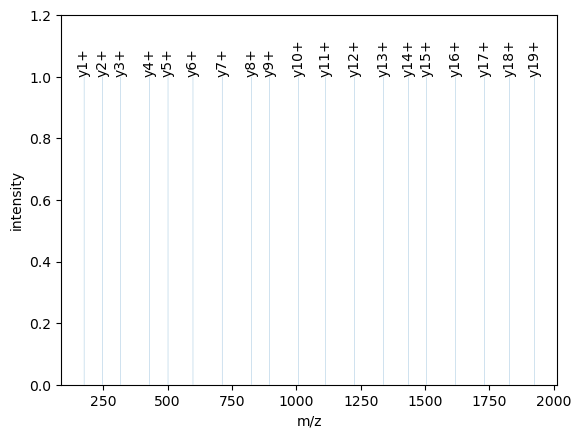

In [121]:
import matplotlib.pyplot as plt
mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) # snap ensures that all bars are rendered
idx = 0
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")

## Annotation for All peptises

In [122]:
dig = ProteaseDigestion()
dig.getEnzymeName()
NOTC1 = "".join([l.strip() for l in open("NOTC1.fasta").readlines()[1:]])
NOTC1 = AASequence.fromString(NOTC1)
# create all digestion products
result = []
dig.digest(NOTC1, result)
peptides = [AASequence.fromString(s.toString()) for s in result]

# Iterate over annotated ions and their masses
for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()

    # standard behavior is adding b- and y-ions of charge 1
    p = Param()
    p.setValue("add_b_ions", "false")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ(),peak.getIntensity())

Spectrum 1 of MPPLLAPLLCLALLPALAAR has 19 peaks.
y1+ is generated at m/z 175.118952913371 1.0
y2+ is generated at m/z 246.156067072871 1.0
y3+ is generated at m/z 317.19318123237105 1.0
y4+ is generated at m/z 430.27724558327105 1.0
y5+ is generated at m/z 501.31435974277105 1.0
y6+ is generated at m/z 598.367123966071 1.0
y7+ is generated at m/z 711.451188316971 1.0
y8+ is generated at m/z 824.535252667871 1.0
y9+ is generated at m/z 895.572366827371 1.0
y10+ is generated at m/z 1008.656431178271 1.0
y11+ is generated at m/z 1111.665616067771 1.0
y12+ is generated at m/z 1224.749680418671 1.0
y13+ is generated at m/z 1337.833744769571 1.0
y14+ is generated at m/z 1434.886508992871 1.0
y15+ is generated at m/z 1505.9236231523712 1.0
y16+ is generated at m/z 1619.0076875032712 1.0
y17+ is generated at m/z 1732.0917518541712 1.0
y18+ is generated at m/z 1829.1445160774713 1.0
y19+ is generated at m/z 1926.1972803007714 1.0
Spectrum 1 of GPR has 2 peaks.
y1+ is generated at m/z 175.118952

## Load mzML file and spectrum for All peptides (Experimental Peptides)

In [123]:
exp = MSExperiment()
# Load mzML file and obtain spectrum for peptide
MzMLFile().load("F46.mzML", exp)
spectra = exp.getSpectra()
#get first spectrum
observed_spectrum = spectra[0]    

## Search Engine Code to get the hits between Theoritical and Experimental 

In [124]:
protein_ids = []
peptide_ids = []
hits = []
MZs = []
INts = []
RTs=[]
c = 0
SimpleSearchEngineAlgorithm().search("F46.mzML", "NOTC1.fasta", protein_ids, peptide_ids)
for peptide_id in peptide_ids:
    # Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    # Store the Intensity and RT and M/Z from Expermintal peptide using the specific position 
    INts.append(spectra[peptide_id.getMetaValue("scan_index")].get_peaks()[1])
    MZs.append(spectra[peptide_id.getMetaValue("scan_index")].get_peaks()[0])
    RTs.append((spectra[peptide_id.getMetaValue("scan_index")].getRT())*MZs[c])
    c+=1
    
    print("Peptide scan name:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
    # PeptideHits
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit charge:", hit.getCharge())
        print(" - Peptide hit sequence:", hit.getSequence())
        hits.append(hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        print(" - Peptide ppm error:", abs(mz - peptide_id.getMZ())/mz *10**6 )
        print(" - Peptide hit score:", hit.getScore())

Peptide ID m/z: 481.533813476563
Peptide ID rt: 250.706052
Peptide scan index: 471
Peptide scan name: 471
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 4
 - Peptide hit sequence: LAAGTLVVVVLM(Oxidation)PPEQLR
 - Peptide hit monoisotopic m/z: 481.2840423614711
 - Peptide ppm error: 518.9682040284873
 - Peptide hit score: 0.0625155046582222
Peptide ID m/z: 385.228741992006
Peptide ID rt: 250.814796
Peptide scan index: 474
Peptide scan name: 474
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 5
 - Peptide hit sequence: LAAGTLVVVVLM(Oxidation)PPEQLR
 - Peptide hit monoisotopic m/z: 385.228689182531
 - Peptide ppm error: 0.13708603870061742
 - Peptide hit score: 0.22435498237609863
Peptide ID m/z: 427.054351806641
Peptide ID rt: 255.832182
Peptide scan index: 558
Peptide scan name: 558
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 5
 - Peptide hit sequence: M(Oxidation)PPLLAPLLC(Carbamidometh

## we generate the theoretical spectrum of peptide

In [125]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
peptide = AASequence.fromString(str(hits[3]))
tsg.getSpectrum(theo_spectrum, peptide, 1, 2)

## we can plot the observed and theoretical spectrum as a mirror plot

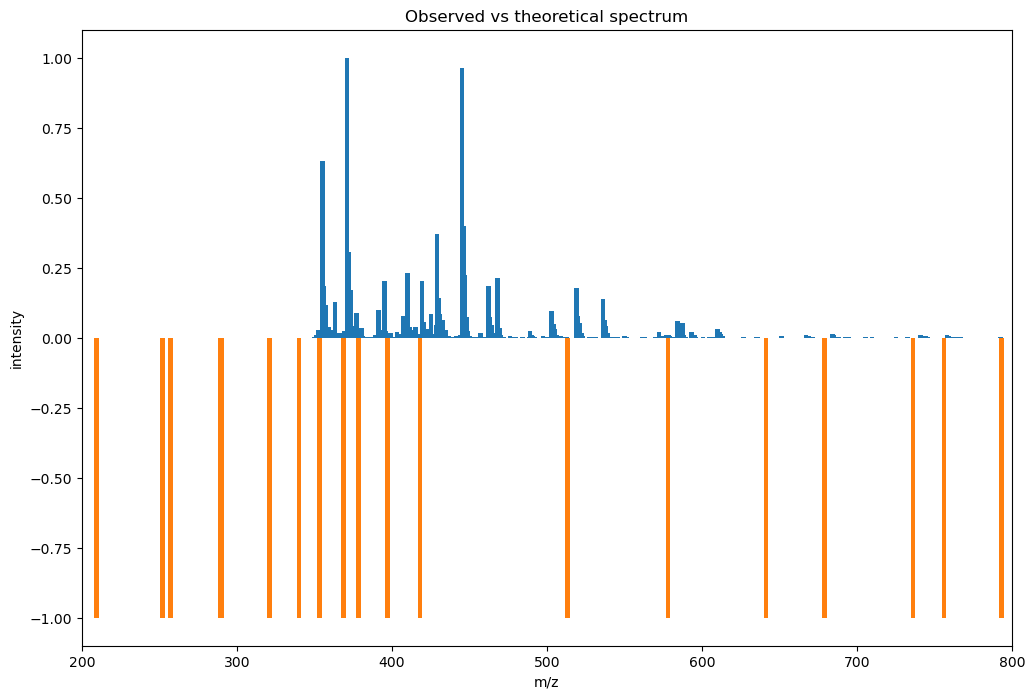

In [126]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / (max(obs_int)) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
    plt.xlim([200.0,800.0])
# observed = expermintal = mzML
obs_mz, obs_int = observed_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
# theo = Theoritical = FASTA
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

## 3D plot for one peptide

Text(0.5, 0, 'Intensity')

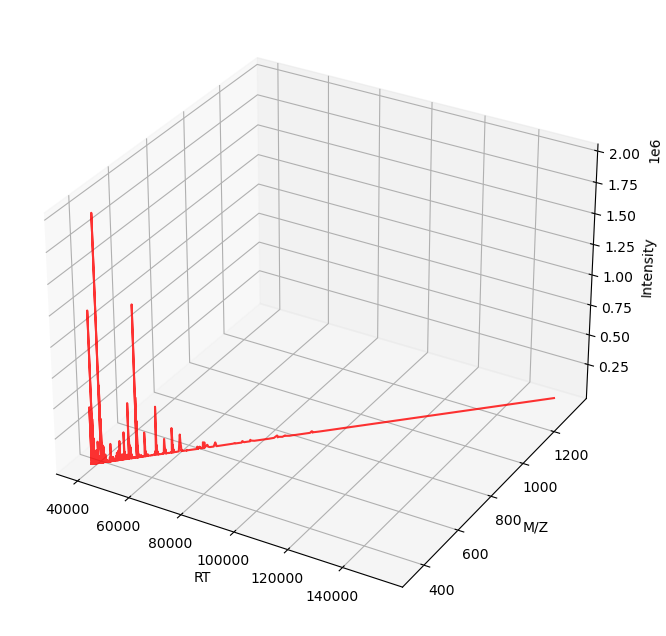

In [127]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
rt = observed_spectrum.getRT()  
RT = [rt]*len(obs_mz)
  
ax.plot(RTs[0],MZs[0], INts[0], zdir='z', color='red',alpha=0.8) 

ax.set_xlabel('RT')
ax.set_ylabel('M/Z')
ax.set_zlabel('Intensity')

## 3D Bar plot for all peptide

Text(0.5, 0, 'Intensity')

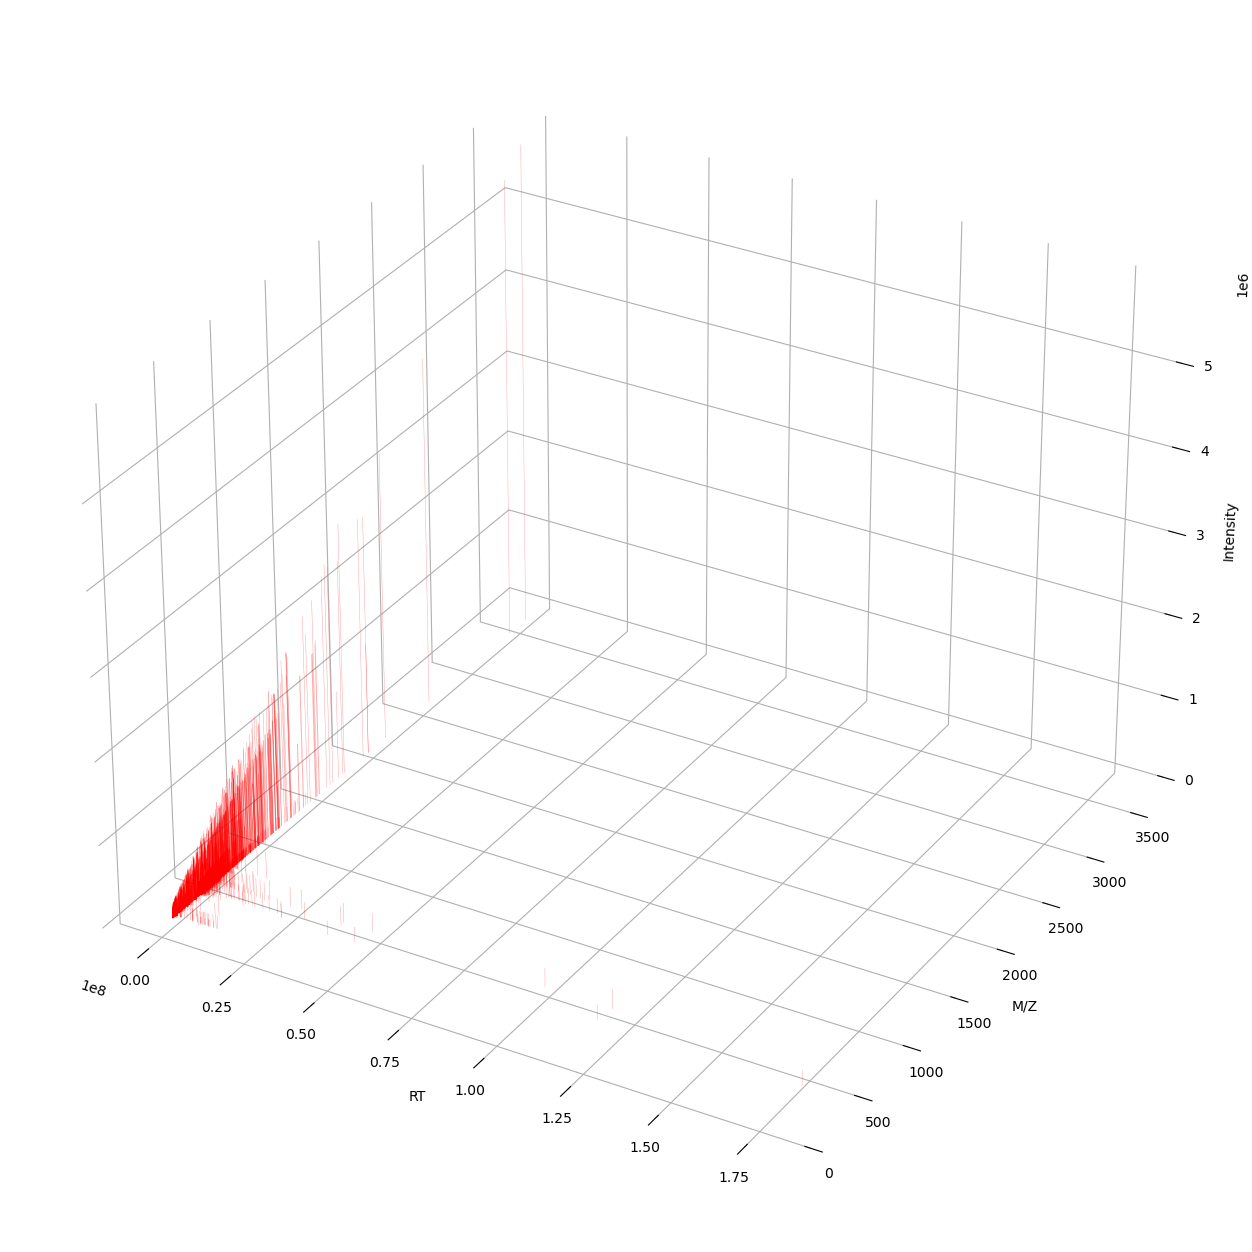

In [128]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
for i in range(len(MZs)):   
    ax.bar(MZs[i],RTs[i],INts[i], zdir='x', color=['red'],alpha=0.4,width=4)    
    #ax.plot(RTs[i],MZs[i], INts[i], zdir='z', color='red',alpha=0.8)     
        
ax.set_xlabel("RT")
ax.set_ylabel('M/Z')
ax.set_zlabel('Intensity')

## We want to find matching peaks between observed and theoretical spectrum

In [129]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 1.0)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
print(max(observed_spectrum.get_peaks()[1]))
# align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

1343175.2


In [130]:
print("Number of matched peaks: " + str(len(alignment)))
print("ionname\tcharge\ttheo m/z\t     theo Int\t observed m/z\t\tobserved Int")
for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())+"\t"+str(theo_spectrum[theo_idx].getIntensity())
      + "\t" + str(observed_spectrum[obs_idx].getMZ())+"\t\t"+str(observed_spectrum[obs_idx].getIntensity()))

Number of matched peaks: 8
ionname	charge	theo m/z	     theo Int	 observed m/z		observed Int
b4+	1	353.156796104771	1.0	353.3426818847656		3021.18212890625
y6++	2	368.655772049521	1.0	368.8288879394531		1334.7322998046875
b7++	2	378.640121985721	1.0	378.2560119628906		2577.594970703125
y7++	2	397.166504097371	1.0	397.2447509765625		12023.23828125
y3+	1	418.20447532807106	1.0	418.2264099121094		20114.40234375
b5+	1	513.187445089971	1.0	512.4756469726562		2025.920654296875
y4+	1	578.235124313271	1.0	578.1293334960938		9118.1396484375
y7+	1	793.325731727971	1.0	792.6802368164062		2565.125732421875


## The mirror plot can also be used to visualize the aligned spectrum

14 15
15 82
16 140
17 196
18 260
19 425
20 460
25 522


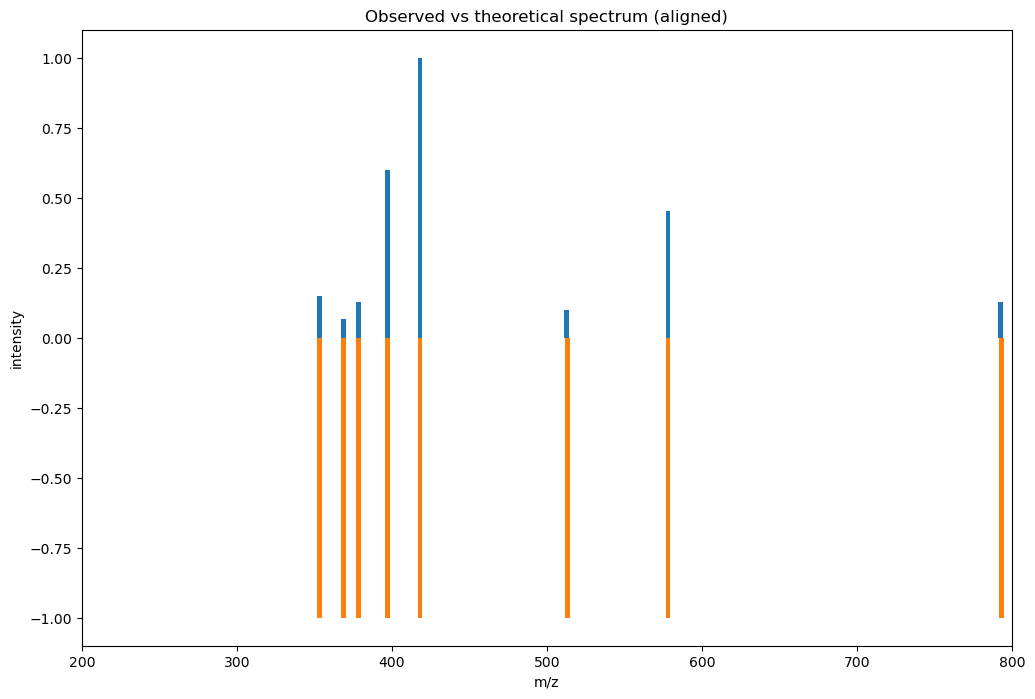

In [131]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())
    print(theo_idx, obs_idx)
title = 'Observed vs theoretical spectrum (aligned)'

for i in range(len(obs_int)):
    if obs_int[i] == 0.0:
        obs_int[i] = -0.001

mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

## 3D plot for one peptide

Text(0.5, 0, 'RT')

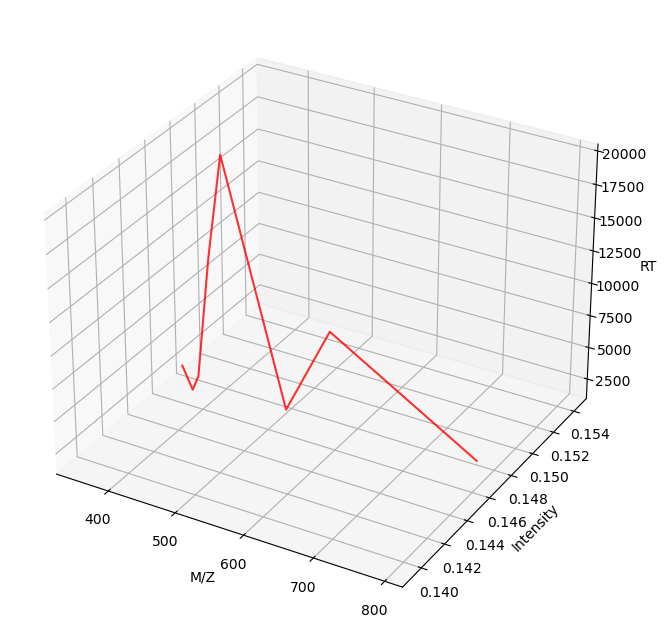

In [132]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
        
z = [rt]*len(obs_mz)
  
ax.plot(obs_mz, obs_int,z, zdir='y', color='red',alpha=0.8) 

ax.set_xlabel('M/Z')
ax.set_ylabel('Intensity')
ax.set_zlabel('RT')